# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [5]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [7]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia




**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


# Data Analyse & Preprocessing :

In [8]:
# getting a dictionnary where the keys are the countries and the values are unique integers
def country_dict(df:pd.DataFrame):
    ctry_dict={}
    k=0
    for _,row in df.iterrows():
        if row['Country'] not in ctry_dict:
            ctry_dict[row['Country']]=k
            k+=1
        else :
            pass
    return(ctry_dict) 

In [58]:
# transform each country name to it's corresponding integer
def country_to_array(df:pd.DataFrame):
    ctry_dict=country_dict(df)
    ctry_list=[]
    for _,row in df.iterrows():
        ctry_list.append(ctry_dict[row['Country']])
    return(np.array(ctry_list))
    

In [62]:
ctry_array=country_to_array(data)
ctry_array=ctry_array.reshape((ctry_array.shape[0],1))
ctry_array.shape

(1000, 1)

In [9]:
#transform each timestamp to an array of integers
import numpy as np
import re
def timestamp_to_array(df:pd.DataFrame):
    time_list=[]
    for _,row in df.iterrows():
        timestamp=row['Timestamp']
        time_list.append(re.split(r'\D+',timestamp))
    return(np.array(time_list,dtype=int))

In [10]:
timestamp_array=timestamp_to_array(data)
timestamp_array.shape

(1000, 6)

In [11]:
def clicks_per_year(df:pd.DataFrame):
    years_array=timestamp_to_array(df)[:,0]
    years=set(years_array)
    cl_p_y={}
    for year in years:
        cl_p_y[year]=cl_p_y.get(year,0)+np.sum((df['Clicked'].to_numpy())*(years_array==year))
    return(cl_p_y)
    
def clicks_per_month(df:pd.DataFrame):
    months_array=timestamp_to_array(df)[:,1]
    months=set(months_array)
    cl_p_m={}
    for month in months:
        cl_p_m[month]=cl_p_m.get(month,0)+np.sum((df['Clicked'].to_numpy())*(months_array==month))
    return(cl_p_m)
def clicks_per_day(df:pd.DataFrame):
    days_array=timestamp_to_array(df)[:,2]
    days=set(days_array)
    cl_p_d={}
    for day in days:
        cl_p_d[day]=cl_p_d.get(day,0)+np.sum((df['Clicked'].to_numpy())*(days_array==day))
    return(cl_p_d)
def clicks_per_hour(df:pd.DataFrame):
    hours_array=timestamp_to_array(df)[:,3]
    hours=set(hours_array)
    cl_p_h={}
    for hour in hours:
        cl_p_h[hour]=cl_p_h.get(hour,0)+np.sum((df['Clicked'].to_numpy())*(hours_array==hour))
    return(cl_p_h)

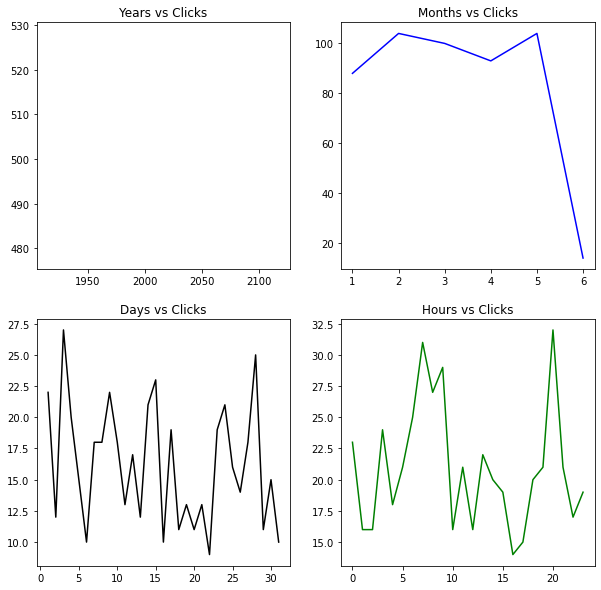

In [12]:
cl_p_y=clicks_per_year(data)
cl_p_m=clicks_per_month(data)
cl_p_d=clicks_per_day(data)
cl_p_h=clicks_per_hour(data)

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].plot(list(cl_p_y.keys()), list(cl_p_y.values()),c='r')
axs[0, 0].set_title('Years vs Clicks')
axs[0, 1].plot(list(cl_p_m.keys()), list(cl_p_m.values()),c='b')
axs[0, 1].set_title('Months vs Clicks')
axs[1, 0].plot(list(cl_p_d.keys()), list(cl_p_d.values()),c='k')
axs[1, 0].set_title('Days vs Clicks')
axs[1, 1].plot(list(cl_p_h.keys()), list(cl_p_h.values()),c='g')
axs[1, 1].set_title('Hours vs Clicks')

plt.show()

### We can remark that there is only one year in the dataset therefore the number of clicks per year is a single point , and also the number of clicks per month is almost constant , however we have a drop for the last month "6" , we can conclude that this drop is due to the low number of data elements with a 'month==6'. Also we remark fluctuations of number of clicks when it comes to the feature of Days and hours.
### As to conclude, we can only take the day as well as the hour in which the Ad is seen and drop the rest of the time stamp.

In [85]:
#getting the clicks per gender dictionnary
def clicks_per_gender(df:pd.DataFrame):
    cl_p_g={0:0,1:0}
    for _,row in df.iterrows():
        cl_p_g[row['gender']]+=row['Clicked']
    return(cl_p_g)
    

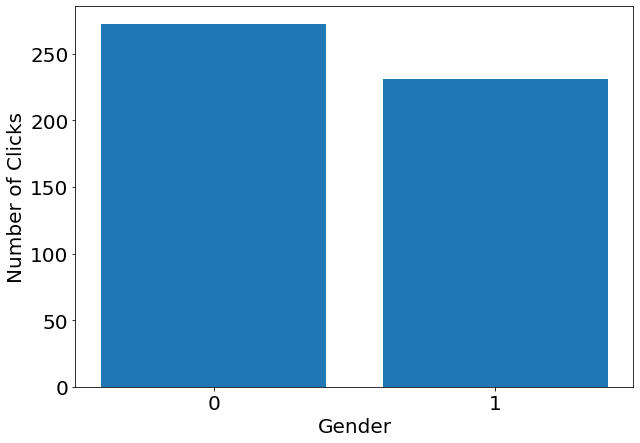

In [103]:
cl_p_g=clicks_per_gender(data)
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["font.size"] = 20
plt.bar(cl_p_g.keys(),cl_p_g.values(),align='center')
plt.xlabel('Gender')
plt.ylabel('Number of Clicks')
plt.xticks([0,1])
plt.show()

## We can remark that there is a small difference when it comes to the number of clicks between the genders , therefore we decide to create two models, one which keeps the Gender Feature and one which drops it

# Embedding the Ad Topic lines using Doc2Vec :

### Now using the Doc2Vec model from gensim we will try to embed the text in 'Ad Topic Line' feature into a vector of floats 

In [14]:
#!pip install nltk
#!pip install gensim

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /home/dhiab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
sentences=data['Ad Topic Line'].tolist()
tok_sent = []
for s in sentences:
    tok_sent.append(word_tokenize(s.lower()))


In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tok_sent)]
tagged_data

/home/dhiab/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[TaggedDocument(words=['seamless', 'impactful', 'info-mediaries'], tags=[0]),
 TaggedDocument(words=['ameliorated', 'actuating', 'workforce'], tags=[1]),
 TaggedDocument(words=['self-enabling', 'local', 'strategy'], tags=[2]),
 TaggedDocument(words=['public-key', 'intangible', 'graphical', 'user', 'interface'], tags=[3]),
 TaggedDocument(words=['team-oriented', 'bi-directional', 'secured', 'line'], tags=[4]),
 TaggedDocument(words=['monitored', 'systematic', 'hierarchy'], tags=[5]),
 TaggedDocument(words=['progressive', 'intermediate', 'throughput'], tags=[6]),
 TaggedDocument(words=['reduced', 'mobile', 'structure'], tags=[7]),
 TaggedDocument(words=['cross-platform', 'directional', 'intranet'], tags=[8]),
 TaggedDocument(words=['enterprise-wide', 'incremental', 'internet', 'solution'], tags=[9]),
 TaggedDocument(words=['user-friendly', 'content-based', 'customer', 'loyalty'], tags=[10]),
 TaggedDocument(words=['focused', 'fresh-thinking', 'graphic', 'interface'], tags=[11]),
 TaggedD

In [18]:
model = Doc2Vec(tagged_data, vector_size = 10, window = 2, min_count = 1, epochs = 1000)

In [42]:
sentence_example=data['Ad Topic Line'][0]

print('sentence example:')
print(sentence_example)
print('-'*100)
test_doc = word_tokenize(sentence_example.lower())
test_doc_vector = model.infer_vector(test_doc)



print('Most similar title:')
print(sentences[model.docvecs.most_similar(positive = [test_doc_vector])[2][0]])

sentence example:
Seamless impactful info-mediaries
----------------------------------------------------------------------------------------------------
Most similar title:
Seamless cohesive conglomeration


<ipython-input-42-63ce96106884>:12: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print(sentences[model.docvecs.most_similar(positive = [test_doc_vector])[2][0]])


In [46]:
def topic_to_array(df: pd.DataFrame):
    topic_list=[]
    for _,row in df.iterrows():
        topic_vector=model.infer_vector(word_tokenize(row['Ad Topic Line'].lower()))
        topic_list.append(topic_vector)
    return(np.array(topic_list))

In [47]:
topic_array=topic_to_array(data)

### When it comes the Nan values in the 'Area Income' column , we decided to  replace the Nan value with the Average value of 'Area Income'

In [51]:
m=np.mean(data.dropna()['Area Income'].to_numpy())
data_avg=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','gender']].fillna(m)
print(data_avg)

     Daily Time Spent on Site  Age   Area Income  Daily Internet Usage  gender
0                       80.67   34  58909.360000                239.76       0
1                       68.01   25  68357.960000                188.32       1
2                       80.94   36  60803.000000                239.94       0
3                       78.77   28  63497.620000                211.83       0
4                       36.56   29  42838.290000                195.89       0
..                        ...  ...           ...                   ...     ...
995                     82.12   54  55343.014555                132.66       1
996                     45.01   26  29875.800000                178.35       0
997                     36.62   36  55343.014555                163.00       0
998                     80.46   29  56909.300000                230.78       0
999                     81.98   34  67432.490000                212.88       0

[1000 rows x 5 columns]


# Getting the Features Vectors 'X' and the Target Vectors 'Y' :

In [164]:
X1=np.concatenate([data_avg.to_numpy(),topic_array,timestamp_array[:,2:4],ctry_array],axis=1)
print(X1.shape)
data_avg_no_gender=data_avg[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
X2=np.concatenate([data_avg_no_gender.to_numpy(),topic_array,timestamp_array[:,2:4],ctry_array],axis=1)
print(X2.shape)
Y=data['Clicked'].to_numpy()
print(Y.shape)

(1000, 18)
(1000, 17)
(1000,)


# Using SVM from sklearn and Hold-out validation for model Assesment :

In [179]:
#split first data to train and validation
from sklearn.model_selection import train_test_split
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1, Y, test_size=0.33, random_state=40)

In [180]:
#split second data to train and validation
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X2, Y, test_size=0.33, random_state=40)

In [181]:
from sklearn import svm
model_click11 = svm.SVC(kernel='linear')
model_click11.fit(X_train1, Y_train1)
model_click12 = svm.SVC(kernel='sigmoid')
model_click12.fit(X_train1, Y_train1)

SVC(kernel='sigmoid')

In [182]:
model_click21 = svm.SVC(kernel='linear')
model_click21.fit(X_train2, Y_train2)
model_click22 = svm.SVC(kernel='sigmoid')
model_click22.fit(X_train2, Y_train2)


SVC(kernel='sigmoid')

In [183]:
def accuracy(model,X_val,Y_val):
    acc=(model.predict(X_val)==Y_val).mean()
    
    return(acc)

In [184]:
print(f'first model with linear kernel accuracy on train set : {accuracy(model_click11,X_train1,Y_train1):.2f}')
print('-'*100)
print(f'first model with linear kernel accuracy on validation set : {accuracy(model_click11,X_val1,Y_val1):.2f}')

first model with linear kernel accuracy on train set : 0.85
----------------------------------------------------------------------------------------------------
first model with linear kernel accuracy on validation set : 0.85


In [185]:
print(f'second model with linear kernel accuracy on train set : {accuracy(model_click21,X_train2,Y_train2):.2f}')
print('-'*100)
print(f'second model with linear kernel accuracy on validation set : {accuracy(model_click21,X_val2,Y_val2):.2f}')

second model with linear kernel accuracy on train set : 0.86
----------------------------------------------------------------------------------------------------
second model with linear kernel accuracy on validation set : 0.84


In [186]:
print(f'first model with sigmoid kernel accuracy on train set : {accuracy(model_click12,X_train1,Y_train1):.2f}')
print('-'*100)
print(f'first model with sigmoid kernel accuracy on validation set : {accuracy(model_click12,X_val1,Y_val1):.2f}')

first model with sigmoid kernel accuracy on train set : 0.38
----------------------------------------------------------------------------------------------------
first model with sigmoid kernel accuracy on validation set : 0.41


In [187]:
print(f'second model with poly kernel accuracy on train set : {accuracy(model_click22,X_train2,Y_train2):.2f}')
print('-'*100)
print(f'second model with poly kernel accuracy on validation set : {accuracy(model_click22,X_val2,Y_val2):.2f}')

second model with poly kernel accuracy on train set : 0.38
----------------------------------------------------------------------------------------------------
second model with poly kernel accuracy on validation set : 0.41


### the first model with linear kernel performs best on validation set therefore we will train it on the whole dataset and test it on the test set

In [188]:
model_final= svm.SVC(kernel='linear')
model_final.fit(X1, Y)

SVC(kernel='linear')

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [193]:
ctry_array_test=country_to_array(test_data)
ctry_array_test=ctry_array_test.reshape((ctry_array_test.shape[0],1))
print(ctry_array_test.shape)

(300, 1)


In [194]:
topic_array_test=topic_to_array(test_data)
print(topic_array_test.shape)

(300, 10)


In [195]:
timestamp_array_test=timestamp_to_array(test_data)
timestamp_array_test.shape

(300, 6)

In [196]:
m=np.mean(test_data.dropna()['Area Income'].to_numpy())
data_avg_test=test_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','gender']].fillna(m)
print(data_avg_test)

     Daily Time Spent on Site  Age   Area Income  Daily Internet Usage  gender
0                       43.88   54  31523.090000                166.85       1
1                       66.40   40  77567.850000                214.42       0
2                       79.52   34  53818.505778                141.58       0
3                       52.35   25  33293.780000                147.61       1
4                       81.51   36  53818.505778                195.93       0
..                        ...  ...           ...                   ...     ...
295                     74.06   23  40345.490000                225.99       0
296                     61.88   42  60223.520000                112.19       1
297                     80.03   44  24030.060000                150.84       0
298                     86.38   33  53818.505778                233.60       0
299                     69.15   46  36424.940000                112.72       0

[300 rows x 5 columns]


In [197]:
X_test=np.concatenate([data_avg_test.to_numpy(),topic_array_test,timestamp_array_test[:,2:4],ctry_array_test],axis=1)
print(X_test.shape)



(300, 18)


In [210]:
dict_test={}
Y_test=model_final.predict(X_test)
dict_test['id']=test_data['id'].to_list()
dict_test['Clicked']=list(Y_test)



In [211]:
submission_df=pd.DataFrame.from_dict(dict_test)
print(submission_df)

       id  Clicked
0    2200        1
1    2201        0
2    2202        1
3    2203        1
4    2204        0
..    ...      ...
295  2495        0
296  2496        1
297  2497        1
298  2498        0
299  2499        1

[300 rows x 2 columns]


In [212]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---